# Plotting in Python and Excel
This Jupyter notebook will contain exercies for you to complete and hand in to the dropbox on D2L.

You may want to have a seperate notebook open for code testing before placing it in the provided box.

The goal is for when I execute the code in the cell it should produce the correct response.
___

### Exercise 1: 
Import the gc_trace.csv file in the data folder on D2L containing a gas chromatography (GC) trace and plot the intensity (y-axis) versus time (x-axis) using a line plot. Be sure to label the axes.

### Exercise 2: 
Load the amine_bp.csv file in the data folder on D2L which contains the boiling points of primary, secondary, and tertiary amines and the number of carbons in each amine. 

1) Plot the number of carbons ($x$-axis) versus boiling point ($y$-axis) for each degree of amine.

2) Your plot should have three distinct trends, one for each degree, represented both in different colors and with different markers.

3) Include a legend on your plot indicating which data points represent which degree of amine.

### Exercise 3: 
The following array contains temperatures in Fahrenheit ($^{\circ}F$). Convert these values to $^{\circ}C$ without using a for loop.
``` python
F = array([0, 32, 100, 212, 451])
```

### Exercise 4: 
The numerical relationship between $\Delta G^\circ$ and $K$ (equilibrium constant) is shown below. Plot $\Delta G^\circ$ versus $K$ at standard temperature and pressure for $K$ values of 0.001 $\rightarrow$ 1000. Use NumPy arrays and do not use any for loops.

$$ \Delta G^\circ = -RT\ln(k) $$

### Exercise 5:
Import the file blue1.csv in the data folder on D2L containing the absorption spectrum of Blue 1 food dye using pandas.

1) Set the wavelengths as the index values.

2) Plot the absorption versus wavelength. Be sure to label the axes.

3) Determine the absorbance of Blue 1 at 620 nm

### Exercise 6:
Import the file kinetics.csv in the data folder on D2L containing time series data for the conversion of A $\rightarrow$
 Product using pandas IO tools. 
 1) Generate new columns for $\ln[A]$, $[A]^{-1}$, and $[A]^{0.5}$
 2) Determine the order of the reaction.

---
In the following space below, create a code that can be used to generate and save plots that you can use for the remainder of the semester. You will need to upload your data from a csv as a Pandas Dataframe. Then from there it can be manuplicated to produce a plot using matplotlib.

For the given example this code to plot average $<emf>$ value as a function of $\Delta T$. 
The data needed is given as the "Thermocouple_Data_Demo.xlsx" excel file in the data section of D2L. Manuplications where done in sheet 1 of the excel to determine the average, standard deviation, 95% confidence level, as well as a linear trend line. The data was then collected into sheet2 where it is set up to be easily read by python.

This code does the following:

1) Sets a variaty of defaults for the plot
   a) Run the first cell before running the second cell 

2) Reads the data file into a Pandas Dataframe

3) Plots the data and adds custom error bars $(\pm<\Delta_{95}>)$ to the data points to display the representative 95% confidence limits of the data.  

4) Add the linear regression trendline on the same graph with your experimental points. 

copy the code below to test this out and make you understand roughly the process that I used to create this plot.

``` python

# Load the example data from the Excel file into a pandas DataFrame
# The DataFrame 'df' is a table where each column can be accessed by its column name
df = pd.read_excel("./Data/Thermocouple_Data_Demo.xlsx", sheet_name=1, header=0)

# Print the data so students can see the table format and column names
print(df)

# Select the two columns we want to plot (needs to be consistant with the Excel file):
# 'Delta T' will be used as the x-values (independent variable)
# 'mean' will be used as the y-values (dependent variable we measured)
x_axis = df["Delta T"]
y_axis = df["mean"]

# Create a new figure and axes to draw on. figsize controls the size in inches, dpi is resolution.
fig, ax = plt.subplots(figsize=(6,4), dpi = 600)

# Plot the data points with error bars using the helper function above.
# df['95% conf'] provides the 95% confidence error for each point (vertical error bars)
plot_errorbar(x_axis, y_axis, df['95% conf'], fmt='ko', color='k', label='data (95% conf)')

# Fit and plot a straight-line (1st order) fit to the same data
plot_linear_fit(x_axis, y_axis, color='r-', label='1st order Fit')

# If you want a quadratic fit as well, uncomment the line below to add it to the plot
# plot_quad_fit(x_axis, y_axis, color='b--', label='2nd order Fit')

# Label the axes. Using a raw string (r'...') avoids Python treating backslashes as special characters.
ax.set_xlabel(r'$\Delta T$ (K)', size=20)  # x-axis label (temperature difference in Kelvin)
ax.set_ylabel(r'Average EMF (mV)', size=20)  # y-axis label (measured EMF in millivolts)

# Add a legend to explain the plotted lines and points. The location and styling can be adjusted.
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Save the final figure to a PNG file so you can include it in a report or upload it.
plt.savefig("EMF_vs_T.png", dpi=600)

# Display the plot in the notebook so you can visually inspect the result
plt.show()

```

## Plotting helper functions — run this first

This code cell imports the plotting and data libraries and defines a few small helper functions (plotting points, adding error bars, and fitting lines). Run that cell before the example plotting cell so these helpers are available.

In [ ]:
# Import the needed libraries
# matplotlib.pyplot (plt) -> used to draw and customize plots
# pandas (pd) -> used for loading and working with table-like data (dataframes)
# numpy (np) -> provides fast numerical operations and array handling
# matplotlib (mpl) -> used to set global plot appearance defaults
# sklearn.metrics.r2_score -> used to compute the R^2 goodness-of-fit metric
import matplotlib.pyplot as plt  # For creating plots
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib as mpl  # For additional plotting functionality
from sklearn.metrics import r2_score # For calculating R^2 score

# Set simple default styles for all plots so they look consistent and readable
mpl.rcParams['font.size'] = 16  # text size for labels and ticks
mpl.rcParams['axes.titlesize'] = 20  # title size when used
mpl.rcParams['lines.linewidth'] = 2  # default line thickness
mpl.rcParams['lines.markersize'] = 8  # default marker size for points


# Helper function: plots data as a simple line with markers
# xaxis: 1D array-like for x values
# yaxis: 1D array-like for y values
# fmt: matplotlib format string (marker+line+color)
# label: text used in the legend
def plot_linear(xaxis, yaxis,  fmt="o-", label="data"):
    # Draw the points and connect them with a line
    ax.plot(xaxis, yaxis,
                fmt,  # format string, e.g., 'o-' means black circles connected by lines
                label = label)  # label used when showing a legend
    

# Helper function: plots data with vertical error bars
# error should be the same length as yaxis and represents the half-width of the error bars
def plot_errorbar(xaxis, yaxis, error, fmt="o", color="k", label="data"):
    # errorbar draws points and adds vertical error bars
    ax.errorbar(xaxis, yaxis,
                yerr = error,  # vertical error amounts for each point
                fmt = fmt,  # marker style for the points
                capsize=8,  # length of the little horizontal cap on error bars
                color = color,  # color of points and bars
                label = label)  # label used for legend
    

# Helper function: fits and plots a straight line (1st order) to the data
# It also prints the line equation and R^2 value so the student can see the fit quality
def plot_linear_fit(xaxis, yaxis, color="r-", label="1st order Fit"):
    # np.polyfit returns fit coefficients and covariance matrix when cov=True
    z, cov = np.polyfit(xaxis, yaxis, 1, cov=True)  # slope and intercept with covariance
    p = np.poly1d(z)  # build a function we can call: p(x)
    r2_p = r2_score(yaxis, p(xaxis))  # R^2 score compares data to fit
    
    # estimate uncertainties for the fit parameters from the covariance matrix
    slope_error = np.sqrt(cov[0, 0])
    intercept_error = np.sqrt(cov[1, 1])
    
    # print a human-readable summary of the fit
    print("")
    print("Fit line: y={:.6f}x+{:.6f}, R^2 = {:.6f}".format(z[0], z[1], r2_p))
    print("Slope error: {:.6f}, Intercept error: {:.6f}".format(slope_error, intercept_error))
    
    # draw the fitted line on the same axes
    ax.plot(xaxis, p(xaxis), color, label=label)  # Plot the linear fit


# Helper function: fits and plots a quadratic (2nd order) function to the data
# This uses the same style as the linear fit function but fits a degree-2 polynomial
def plot_quad_fit(xaxis, yaxis, color="r-", label="2nd order Fit"):
    # Use the local xaxis and yaxis variables (not global names)
    z, cov = np.polyfit(xaxis, yaxis, 2, cov=True)  # quadratic coefficients and covariance
    p = np.poly1d(z)
    r2_p = r2_score(yaxis, p(xaxis))

    # calculate uncertainties from covariance matrix diagonal entries
    slope_x2_error = np.sqrt(cov[0, 0])  # coefficient for x^2
    slope_x_error = np.sqrt(cov[1, 1])   # coefficient for x
    intercept_error = np.sqrt(cov[2, 2]) # constant term

    print("")
    print("Fit line: y={:.6f}x^2+{:.6f}x+{:.6f}, R^2 = {:.6f}".format(z[0], z[1], z[2], r2_p))
    print("Slope (x^2) error: {:.6f}, Slope (x) error: {:.6f}, Intercept error: {:.6f}".format(slope_x2_error, slope_x_error, intercept_error))

    # plot the quadratic fit curve on the axes
    ax.plot(xaxis, p(xaxis), color, label=label)  # Plot the quadratic fit

In [ ]:
# Load the example data from the Excel file into a pandas DataFrame
# The DataFrame 'df' is a table where each column can be accessed by its column name
df = pd.read_excel("./Data/Thermocouple_Data_Demo.xlsx", sheet_name=1, header=0)

# Print the data so students can see the table format and column names
print(df)

# Select the two columns we want to plot (needs to be consistant with the Excel file):
# 'Delta T' will be used as the x-values (independent variable)
# 'mean' will be used as the y-values (dependent variable we measured)
x_axis = df["Delta T"]
y_axis = df["mean"]

# Create a new figure and axes to draw on. figsize controls the size in inches, dpi is resolution.
fig, ax = plt.subplots(figsize=(6,4), dpi = 600)

# Plot the data points with error bars using the helper function above.
# df['95% conf'] provides the 95% confidence error for each point (vertical error bars)
plot_errorbar(x_axis, y_axis, df['95% conf'], fmt='o', color='k', label='data (95% conf)')

# Fit and plot a straight-line (1st order) fit to the same data
plot_linear_fit(x_axis, y_axis, color='r-', label='1st order Fit')

# If you want a quadratic fit as well, uncomment the line below to add it to the plot
# plot_quad_fit(x_axis, y_axis, color='b--', label='2nd order Fit')

# Label the axes. Using a raw string (r'...') avoids Python treating backslashes as special characters.
ax.set_xlabel(r'$\Delta T$ (K)', size=20)  # x-axis label (temperature difference in Kelvin)
ax.set_ylabel(r'Average EMF (mV)', size=20)  # y-axis label (measured EMF in millivolts)

# Add a legend to explain the plotted lines and points. The location and styling can be adjusted.
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.20), fancybox=True, shadow=True, ncol=2)

# Save the final figure to a PNG file so you can include it in a report or upload it.
plt.savefig("EMF_vs_T.png", dpi=600)

# Display the plot in the notebook so you can visually inspect the result
plt.show()

---
Produce a similar plot using the data provided in the Excel File "Data/Thermocouple_Data_Exersise.xlsx".

There are some differences with this data. First as you will notice that there are more runs and less temperature baths.

I would like you to write a code to produce the| following plot using the code above as a template. The plot should contain:

1) Prepare a scatter plot of these data (<emf> vs. T) and add error bars ($(\pm<\Delta_{95}>)$) 
2) Perform both first and second-order regression analyses on the data plotted in the previous step. Include the best fit line and $R^2$ values as text in your program.
3) Plot both the first and second order regression on the plot
4) Add a legend to the plot
    
Your final plot should look like the final plot given on D2L:
    
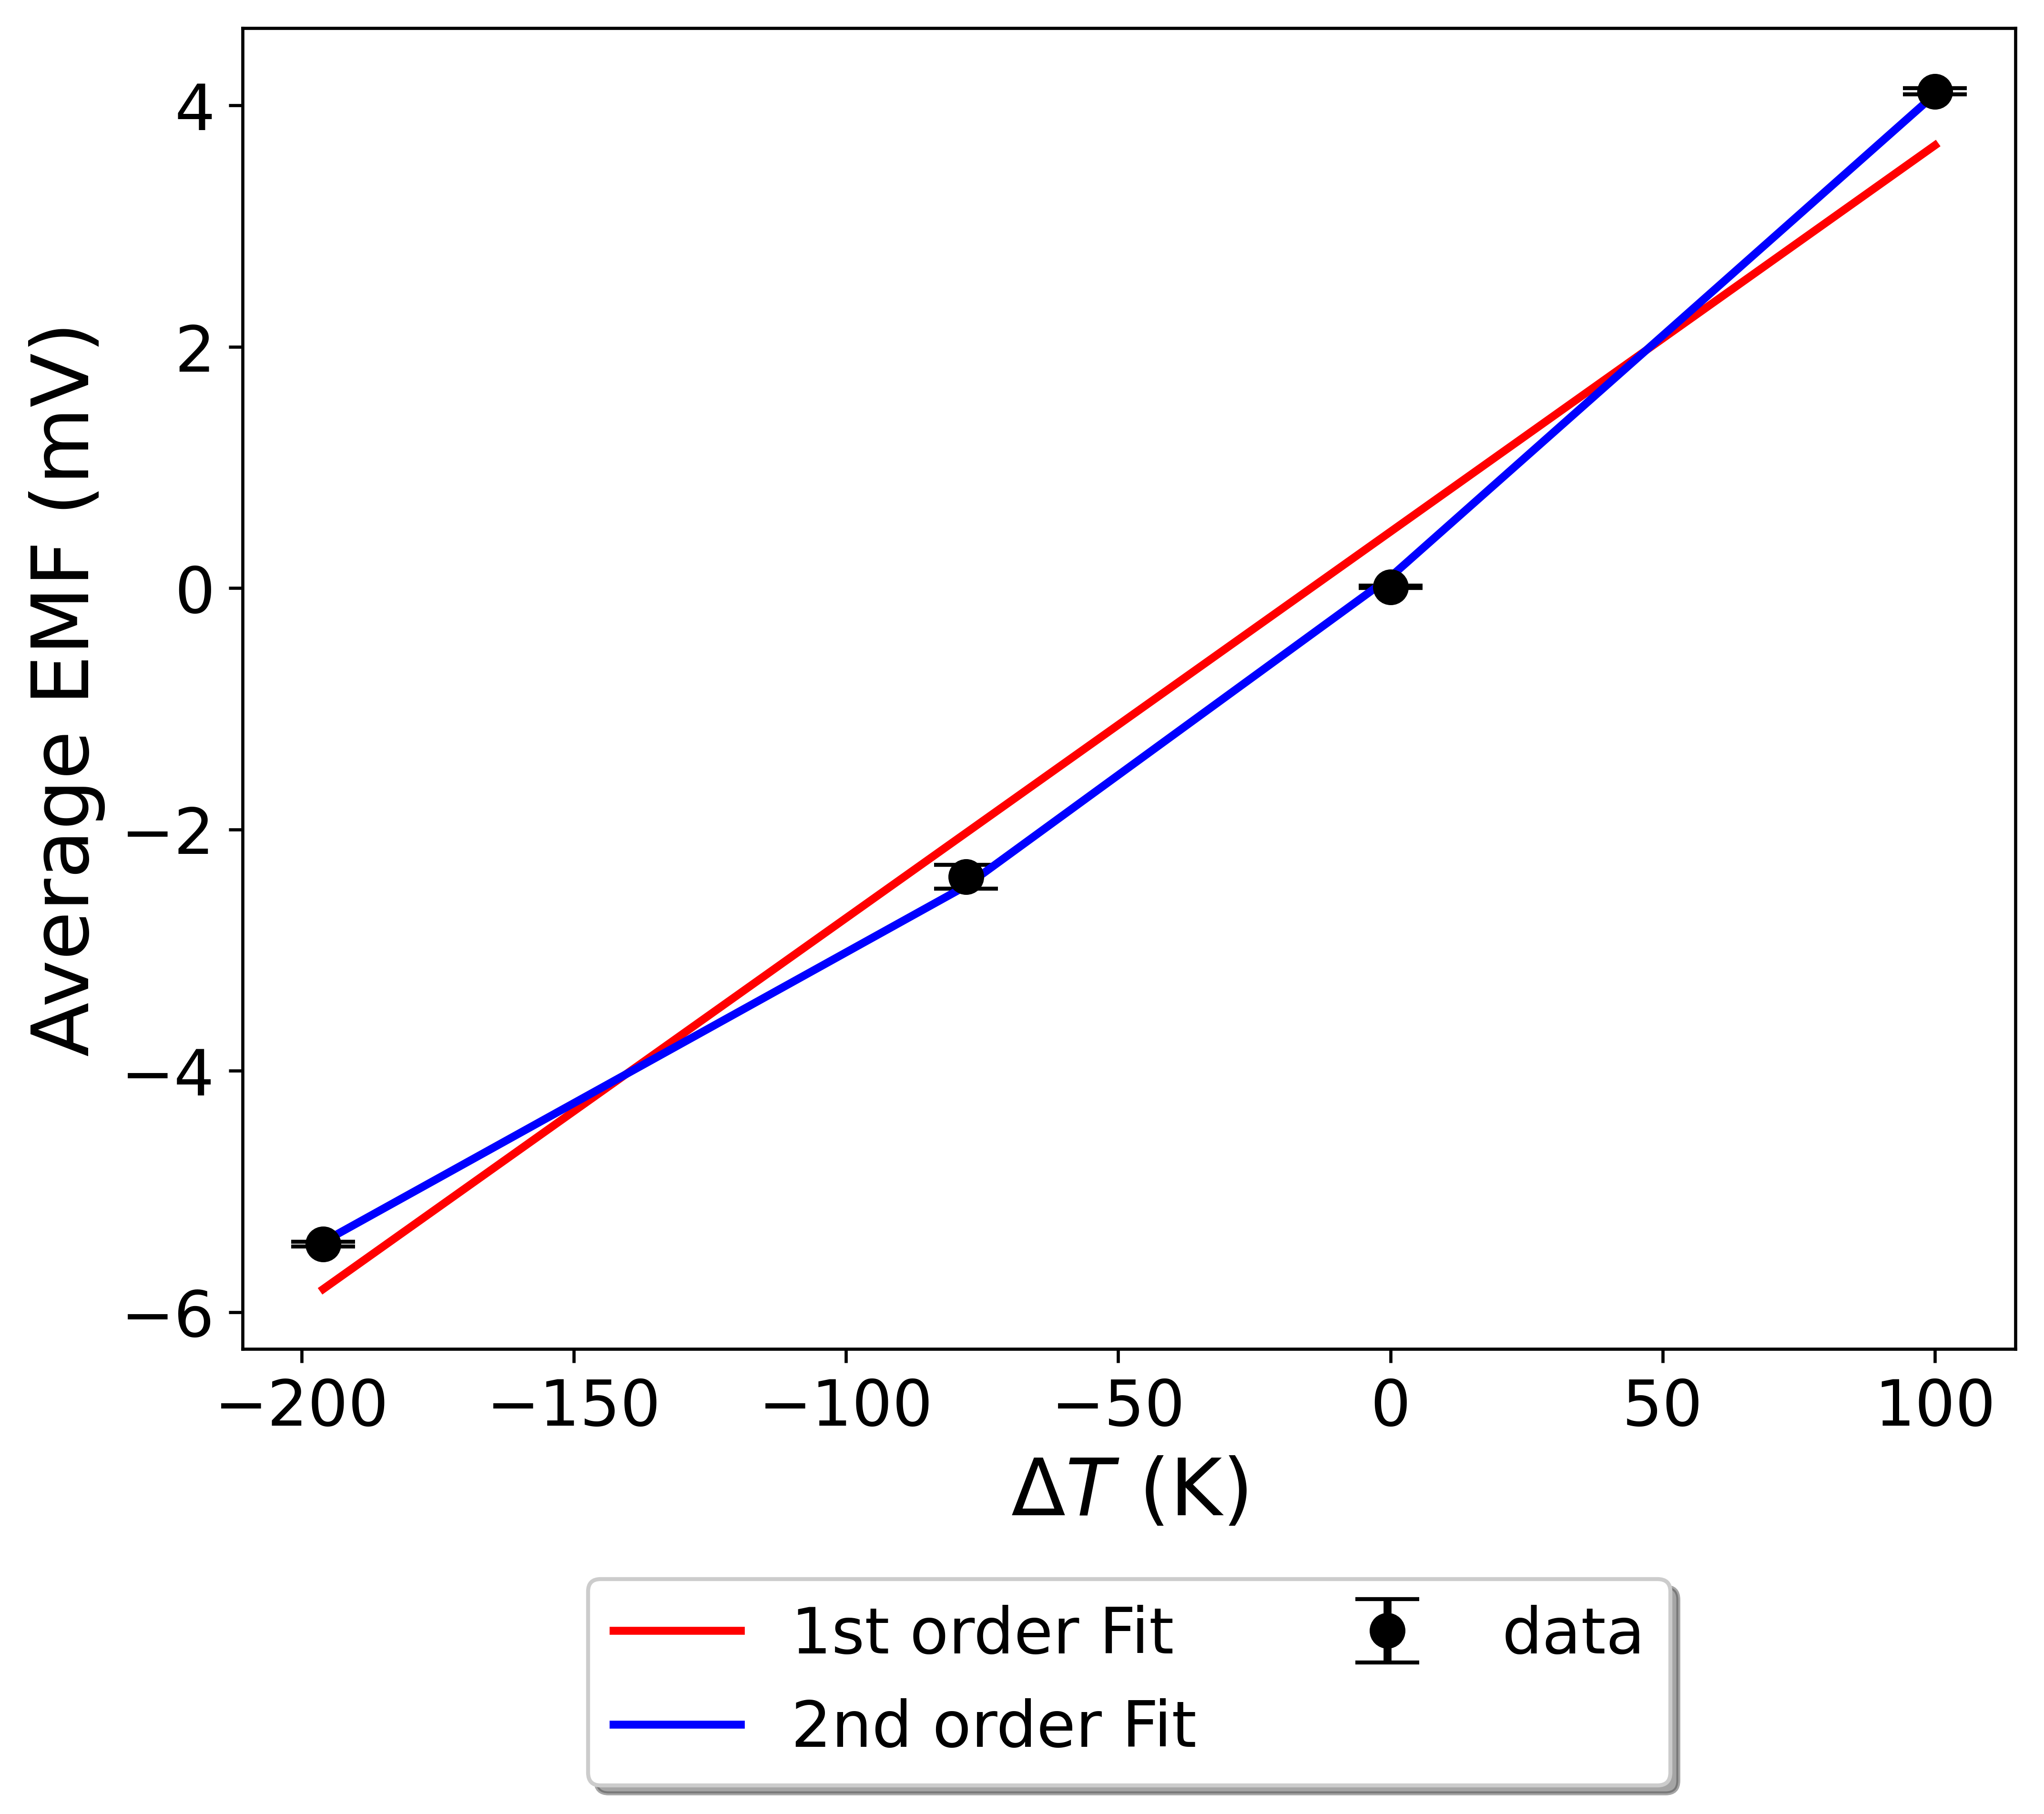